In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import h5py
import matplotlib
from sklearn.gaussian_process import GaussianProcessRegressor

In [11]:
#FROM https://github.com/krasserm/bayesian-machine-learning/blob/master/gaussian_processes_util.py
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean', linewidth=5)
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}', linewidth=5)
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx', linewidth=5)
    plt.legend()

In [3]:
x_train=np.arange(0,5,.5).reshape((-1,1))
y_true=np.sin(x_train)#x+40*np.sqrt(x)+10*np.abs(x)-50*x**2
y_train=y_true+.5*np.random.random((y_true.shape[0],1))
n = 50
x_test = 5*(np.random.random(50))
x_test=np.sort(x_test).reshape(-1,1)

In [4]:
def rbf(x1, x2, l, sigma):
    dist = np.sum(x1**2,1).reshape(-1,1) + np.sum(x2**2,1) - 2*np.dot(x1, x2.T)
    return  sigma**2 *np.exp(-.5 /( (l**2) * dist))


In [5]:
def pred(x_test, x_train, y_train, l, sigma1, sigma2):
    print(x_test.shape, x_train.shape, y_train.shape)
    k=rbf(x_train, x_train, l, sigma1)+sigma2**2*np.eye((x_train.shape[0]))
    ks=rbf(x_train, x_test, l, sigma1)
    kss=rbf(x_test, x_test, l, sigma1)+ 1e-8 * np.eye(x_test.shape[0])
    print(k.shape, ks.shape, kss.shape)
    mu=ks.T@np.linalg.inv(k)@y_train
    cov=kss-ks.T@np.linalg.inv(k)@ks
    print(mu.shape, cov.shape)
    return mu,cov

In [6]:
mu,cov=pred(x_test, x_train, y_train, 2, 1, 1e-8)

(50, 1) (10, 1) (10, 1)
(10, 10) (10, 50) (50, 50)
(50, 1) (50, 50)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
samples = np.random.multivariate_normal(mu.ravel(), cov, 5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


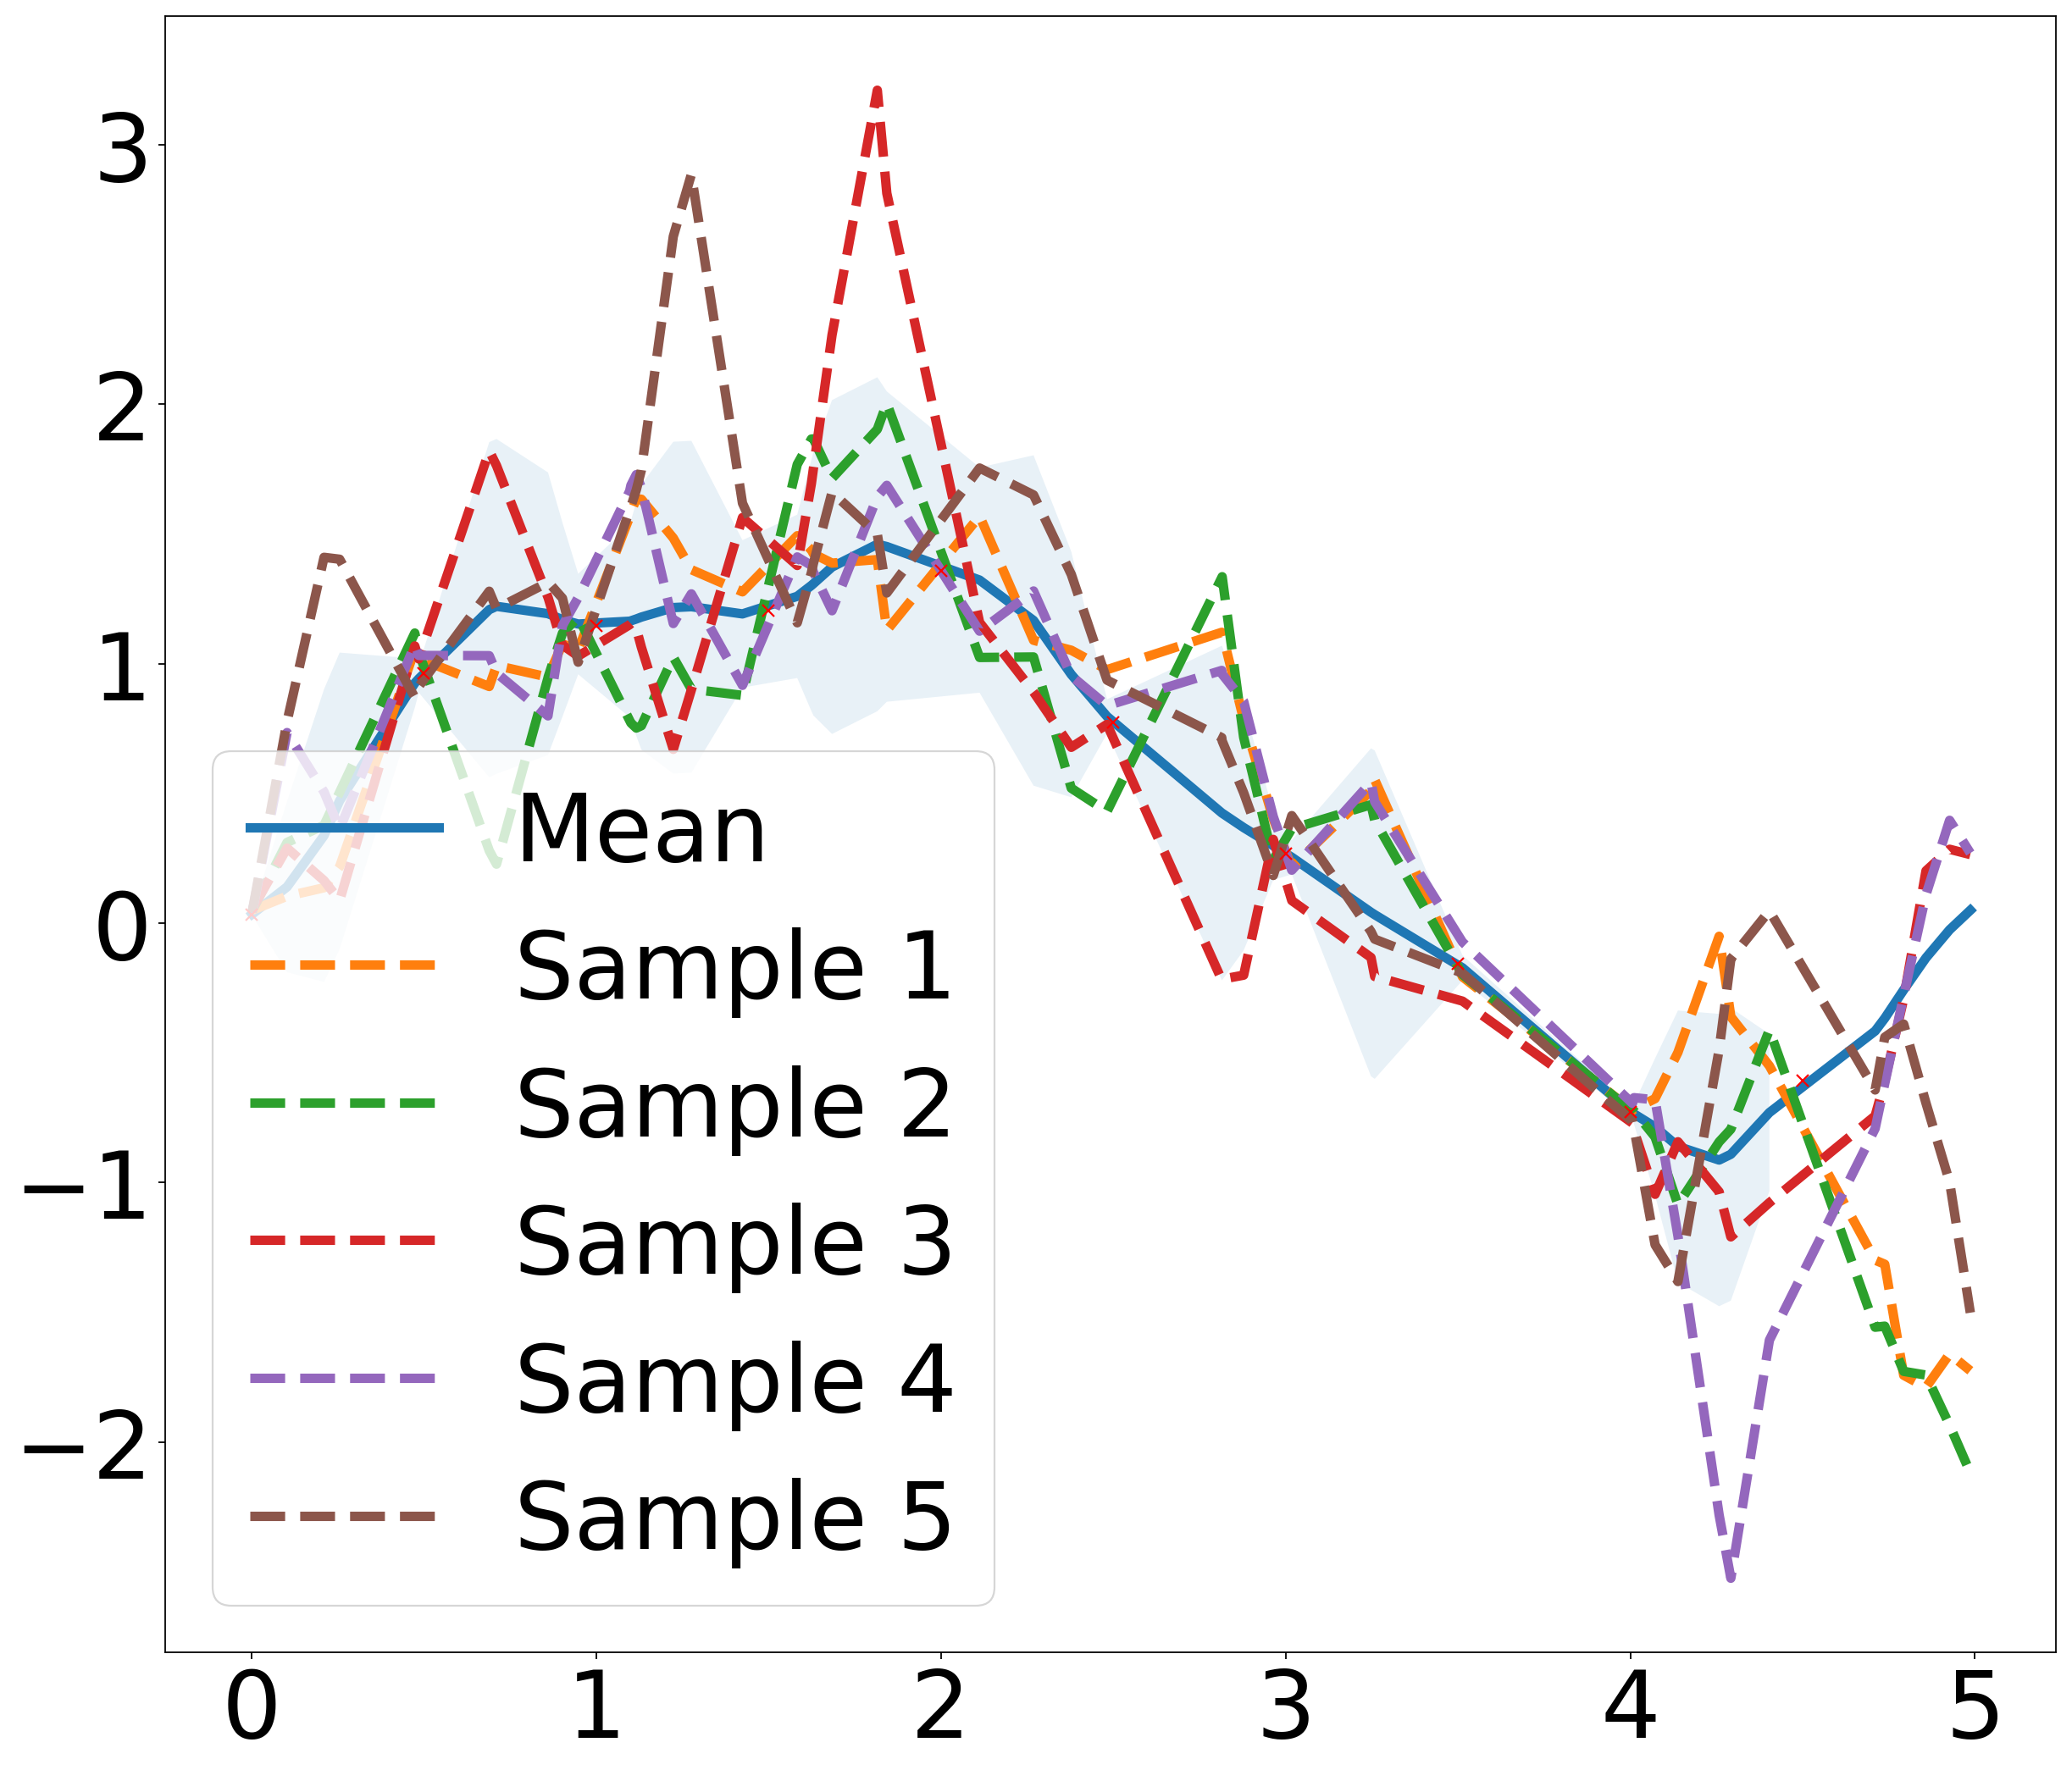

In [13]:
%config InlineBackend.figure_format = 'retina'
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
matplotlib.rcParams.update({'font.size': 50})

plot_gp(mu, cov,x_test , X_train=x_train, Y_train=y_train, samples=samples)
plt.savefig('Gaussainreg.png')

In [14]:
f = h5py.File('robotxtest.h5', 'r')
x_test=np.array(f.get('dataset1')).T
f = h5py.File('robotxtrain.h5', 'r')
x_train=np.array(f.get('dataset1')).T
f = h5py.File('robotytest.h5', 'r')
y_test=np.array(f.get('dataset1'))
f = h5py.File('robotytrain.h5', 'r')
y_train=np.array(f.get('dataset1'))


In [15]:
len_train=[10,100,1000,5000,10000]
res_ls=[]

In [16]:
for l in len_train:
    res=GaussianProcessRegressor().fit(x_train[:l],y_train[:l])
    res2=res.predict(x_test)
    res_ls.append(np.linalg.norm(res2-y_test))

Text(0.5, 1.0, 'Data Adaptation')

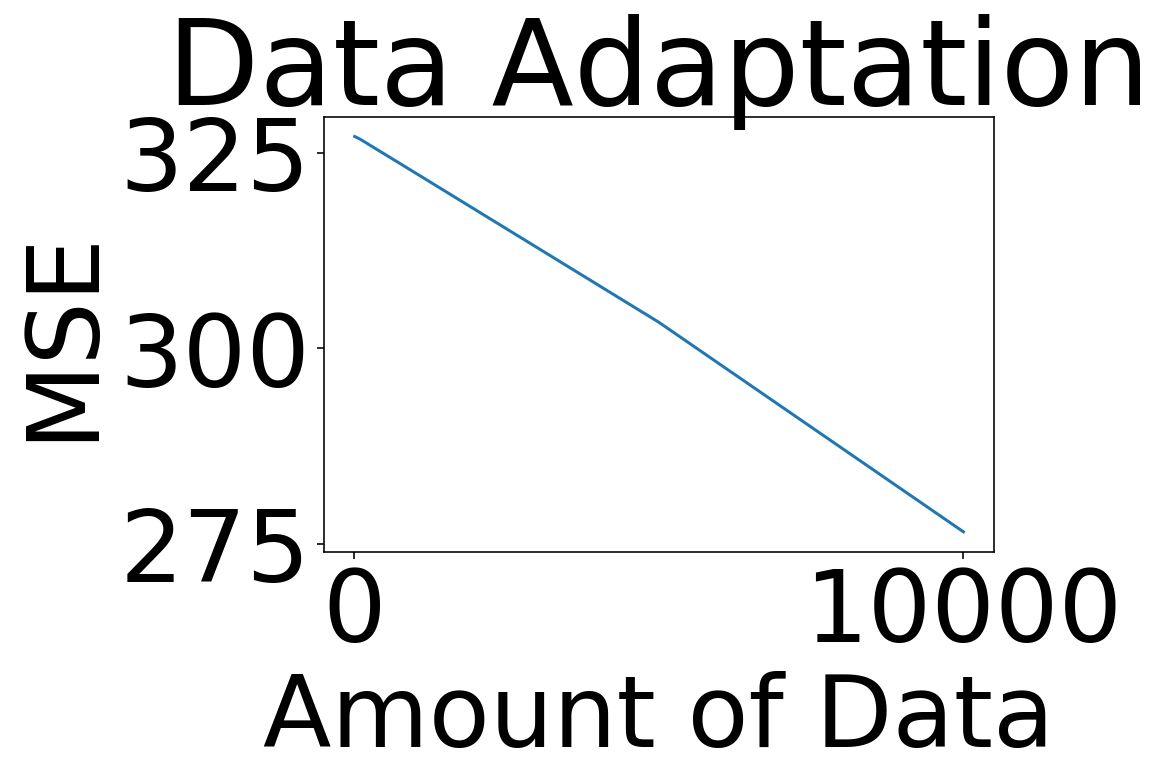

In [22]:
plt.plot(len_train,res_ls)
plt.xlabel('Amount of Data')
plt.ylabel('MSE')
plt.title('Data Adaptation')

In [21]:
np.array(res_ls)/x_test.shape[0]

array([0.07351932, 0.07344099, 0.07247716, 0.06817816, 0.06214904])

(4449, 27)